In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report , confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/covertype.csv")
df.sample(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
473805,3097,10,11,0,0,949,208,218,146,1980,...,0,0,0,0,0,0,0,0,0,2
498525,3228,55,11,234,23,1639,227,216,121,560,...,0,0,0,0,0,0,0,1,0,7
267807,3183,159,8,30,3,3510,229,242,145,3137,...,0,0,0,0,0,0,0,0,0,1
195318,3348,349,16,400,78,3589,188,211,160,2007,...,0,0,0,0,0,0,1,0,0,1
174483,3194,135,2,446,42,4702,222,238,152,2321,...,0,0,0,0,0,0,0,0,0,2


In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [11]:
df.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2"],axis=1,inplace=True)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5


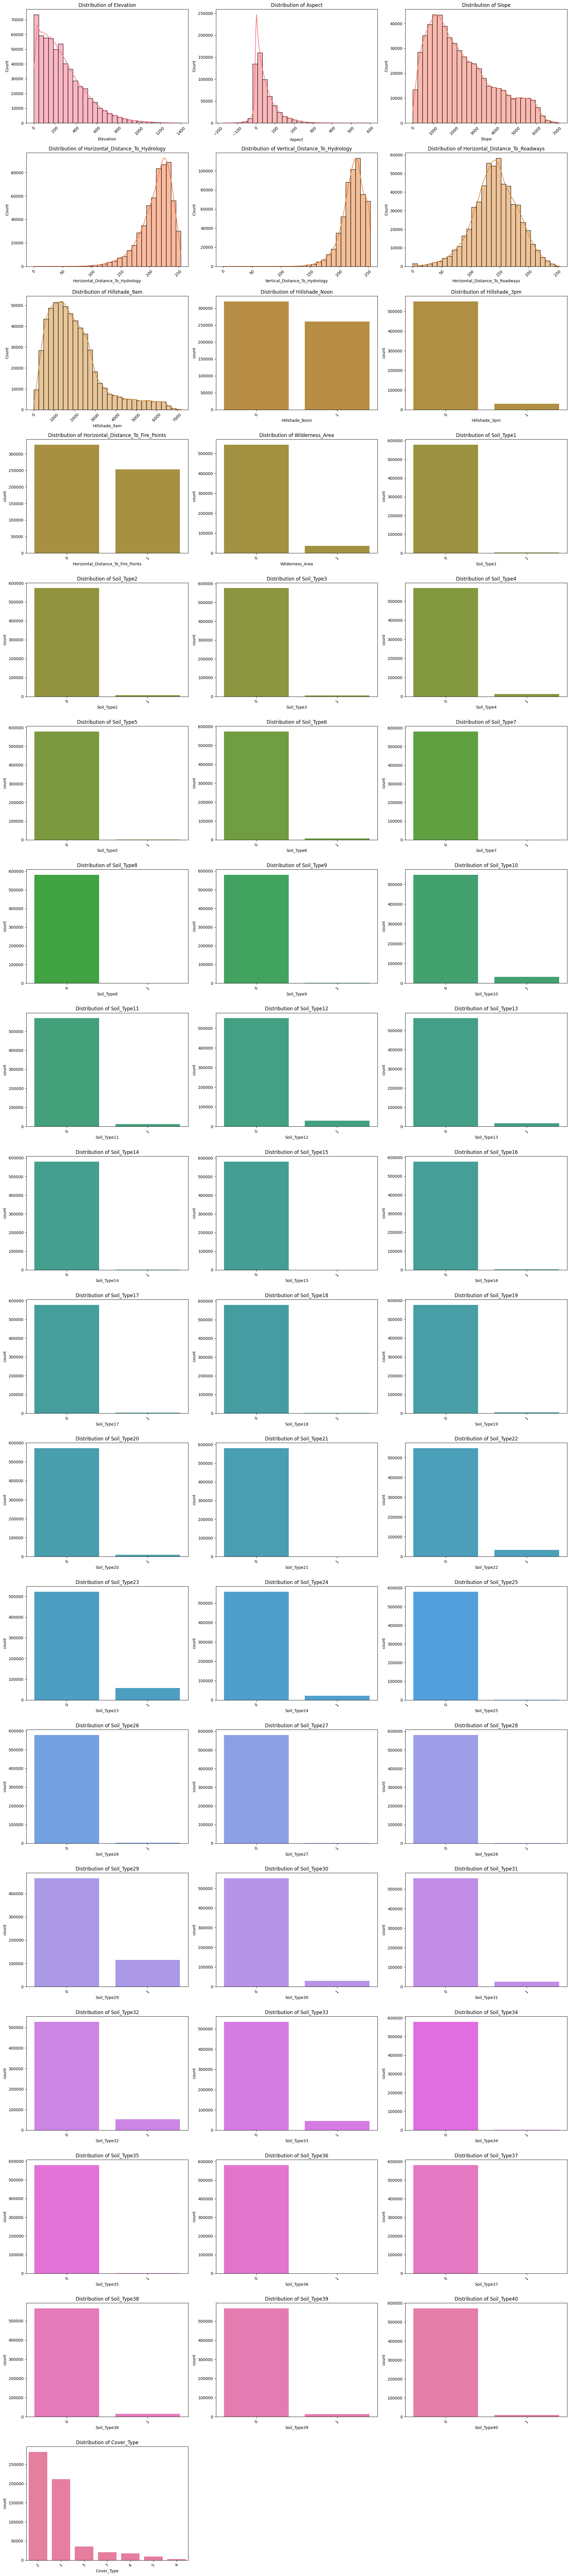

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Number of rows for subplots
n_rows = (len(numeric_cols) + 2) // 3

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Define a list of colors (you can add more or use a color palette)
colors = sns.color_palette('husl', len(numeric_cols))  # Unique colorful palette

# Loop through each column
for i, col in enumerate(numeric_cols):
    color = colors[i]  # Assign a unique color to each plot

    if df[col].nunique() < 20:  # Discrete
        sns.countplot(data=df, x=col, ax=axes[i],
                      order=df[col].value_counts().index[:20],
                      color=color)
    else:  # Continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True,
                     bins=30, color=color)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

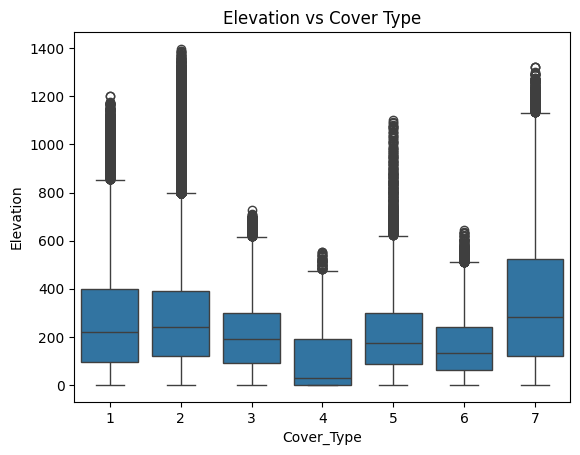

In [18]:
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Elevation vs Cover Type")
plt.show()

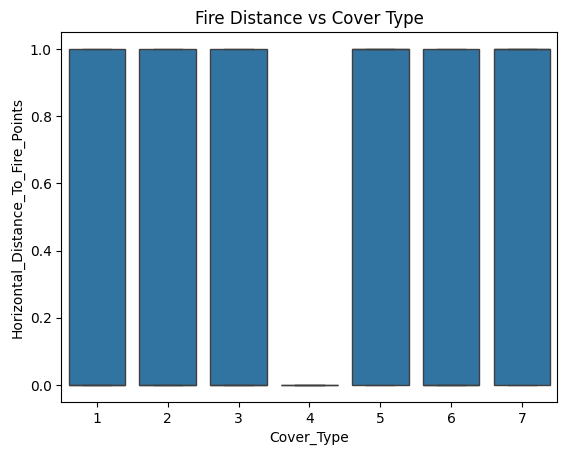

In [14]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=df)
plt.title("Fire Distance vs Cover Type")
plt.show()

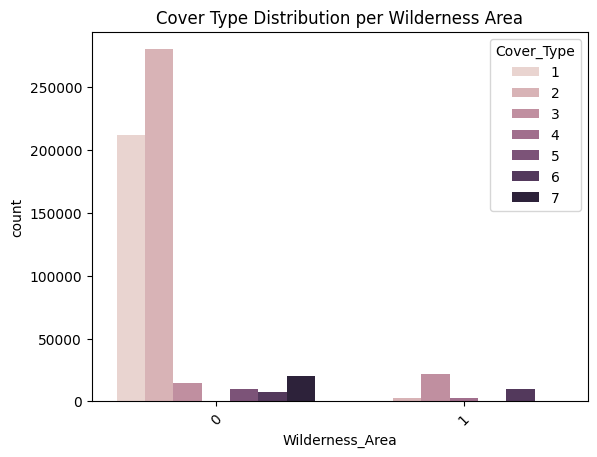

In [15]:
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=df)
plt.title("Cover Type Distribution per Wilderness Area")
plt.xticks(rotation=45)
plt.show()

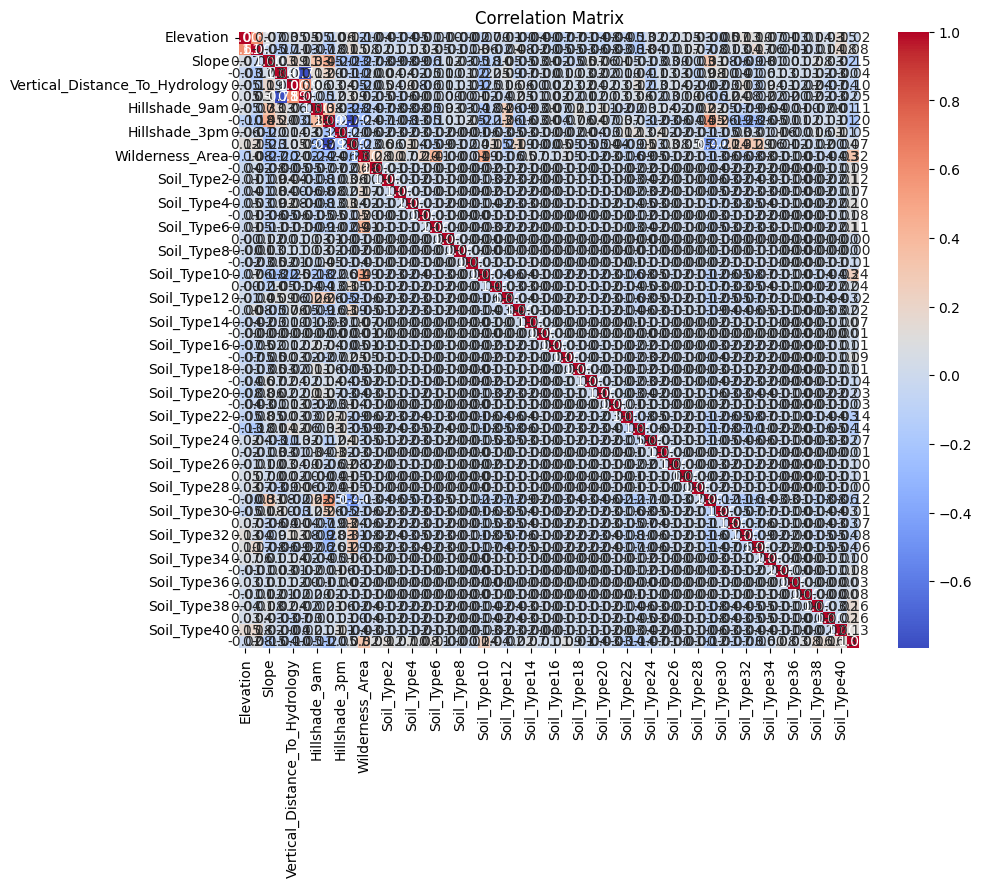

In [16]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
correlation = df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area                       0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Aspect                                0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Horizontal_Distance_To_Fire_Points    0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Soil_Type16  

In [20]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced')
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [23]:
y_pred_rf = rf.predict(X_test)

In [24]:
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.90      0.80      0.85       549
           5       0.94      0.76      0.84      1899
           6       0.90      0.85      0.88      3473
           7       0.97      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



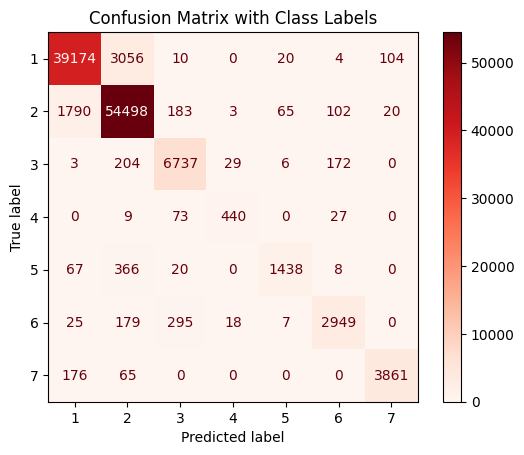

In [25]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

In [26]:
# Shift class labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

In [ ]:
param_grid_xgb = {
    'n_estimators' : [100,200,300],
    'max_depth' : [5,10],
    'learning_rate': [0.001,0.005,0.01,0.1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
y_pred_xgb = grid_search.predict(X_test) +1

In [ ]:
print(classification_report(y_test , y_pred_xgb))

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

In [ ]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(
    grid_search.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

In [ ]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(10).sort_values().plot(kind = 'barh' , color = 'red' , ax = axes[0])

axes[0].set_title("Top 10 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(10).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 10 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

In [ ]:
metrics_rf = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

metrics_xgb = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb, average='macro'),
    recall_score(y_test, y_pred_xgb, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro')
]

# Labels
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_names))  # label locations
width = 0.35  # bar width

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_rf, width, label='Random Forest')
plt.bar(x + width/2, metrics_xgb, width, label='XGBoost')

# Customize
plt.ylabel('Score')
plt.title('Performance Comparison: Random Forest vs XGBoost')
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()